In [1]:
import os
import glob
import numpy as np
import pandas as pd
import folderstats
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt

In [2]:
path_fig=os.getcwd()+'/paper/figures/'

In [3]:
df=folderstats.folderstats("./",ignore_hidden=True)

In [4]:
for k in range(df.shape[0]):
    if df.loc[k,"folder"]:
        suff='/'
    else:
        suff=''
    df.loc[k,"path"]=str(df.loc[k,"path"][2:])+suff
    df.loc[k,"name"]=str(df.loc[k,"name"])+suff

In [5]:
idx=df["extension"].isin(["cpp","h","None",None])
df=df[idx].copy()

In [6]:
df.columns

Index(['id', 'path', 'name', 'extension', 'size', 'atime', 'mtime', 'ctime',
       'folder', 'num_files', 'depth', 'parent', 'uid'],
      dtype='object')

In [7]:
cols=['id', 'path', 'name', 'extension',  'folder', 'depth', 'parent',]
df=df[cols]
folders=["simulob/","src/","include/",]
idx=np.logical_or(df["folder"]==False,np.logical_and(df["folder"]==True,df["name"].isin(folders)))
df=df[idx]

In [8]:
idx=np.logical_not(df["depth"]>=4)
df=df[idx]

In [9]:
df.sort_values(by='id',inplace=True)
df.reset_index(inplace=True,drop=True)
df.reset_index(inplace=True)

In [10]:
df

,index,id,path,name,extension,folder,depth,parent
0,0,5,simulob/,simulob/,None,True,1,1
1,1,6,simulob/include/,include/,None,True,2,5
2,2,7,simulob/include/user.h,user,h,False,2,6
3,3,8,simulob/include/gui.h,gui,h,False,2,6
4,4,9,simulob/include/orderbook.h,orderbook,h,False,2,6
5,5,10,simulob/include/hawkes.h,hawkes,h,False,2,6
6,6,11,simulob/include/orders.h,orders,h,False,2,6
7,7,12,simulob/include/controller.h,controller,h,False,2,6
8,8,13,simulob/LICENSE,LICENSE,None,False,1,5
9,9,15,simulob/src/,src/,None,True,2,5


In [11]:
cols=list(df.columns)
cols[0]="pnt"
cols[3]='file'
df.columns=cols

In [12]:
# G.nodes.data()

In [13]:
keys=df.loc[:,["pnt","id"]].copy()

In [14]:
df.columns

Index(['pnt', 'id', 'path', 'file', 'extension', 'folder', 'depth', 'parent'], dtype='object')

In [15]:
cols=list(keys.columns)
cols[0]="par_pnt"
keys.columns=cols
#keys

In [16]:
df=df.merge(keys,how="left",left_on="parent",right_on="id").drop(columns=["id_y"])
idx=pd.isna(df["par_pnt"]).values
df.loc[idx,"par_pnt"]=-1
df["par_pnt"]=df["par_pnt"].astype(np.int)

In [17]:
df.columns

Index(['pnt', 'id_x', 'path', 'file', 'extension', 'folder', 'depth', 'parent',
       'par_pnt'],
      dtype='object')

In [18]:
df.drop(columns=["id_x","parent"],inplace=True)
cols=list(df.columns)
cols[0]="id"
cols[-1]="parent"
df.columns=cols

In [19]:
cols=list(df.columns)
newcols=[]
newcols.append(cols[0])
newcols.append(cols[5])
newcols.append(cols[2])
newcols.append(cols[3])
newcols.append(cols[-1])
newcols.append(cols[4])
newcols.append(cols[1])
df=df[newcols]

In [20]:
idx=np.logical_not(df['file'].isin(["LICENSE","Makefile","Makefile2","lob"]))
df=df[idx].copy()

In [21]:
df[["id","depth","file","extension","parent","path"]]

,id,depth,file,extension,parent,path
0,0,1,simulob/,None,-1,simulob/
1,1,2,include/,None,0,simulob/include/
2,2,2,user,h,1,simulob/include/user.h
3,3,2,gui,h,1,simulob/include/gui.h
4,4,2,orderbook,h,1,simulob/include/orderbook.h
5,5,2,hawkes,h,1,simulob/include/hawkes.h
6,6,2,orders,h,1,simulob/include/orders.h
7,7,2,controller,h,1,simulob/include/controller.h
9,9,2,src/,None,0,simulob/src/
10,10,2,main,cpp,9,simulob/src/main.cpp


In [22]:
df[["id","depth","file","extension","parent","path"]].to_latex(index=False)

'\\begin{tabular}{rrllrl}\n\\toprule\n id &  depth &        file & extension &  parent &                          path \\\\\n\\midrule\n  0 &      1 &    simulob/ &      None &      -1 &                      simulob/ \\\\\n  1 &      2 &    include/ &      None &       0 &              simulob/include/ \\\\\n  2 &      2 &        user &         h &       1 &        simulob/include/user.h \\\\\n  3 &      2 &         gui &         h &       1 &         simulob/include/gui.h \\\\\n  4 &      2 &   orderbook &         h &       1 &   simulob/include/orderbook.h \\\\\n  5 &      2 &      hawkes &         h &       1 &      simulob/include/hawkes.h \\\\\n  6 &      2 &      orders &         h &       1 &      simulob/include/orders.h \\\\\n  7 &      2 &  controller &         h &       1 &  simulob/include/controller.h \\\\\n  9 &      2 &        src/ &      None &       0 &                  simulob/src/ \\\\\n 10 &      2 &        main &       cpp &       9 &          simulob/src/main.cpp 

In [23]:
df=df[np.logical_not(df['extension']=='h')]
id_orderbook=int(df.loc[df["file"]=="orderbook","id"])
id_hawkes=int(df.loc[df["file"]=="hawkes","id"])
id_orders=int(df.loc[df["file"]=="orders","id"])
id_user=int(df.loc[df["file"]=="user","id"])
id_gui=int(df.loc[df["file"]=="gui","id"])
id_main=int(df.loc[df["file"]=="main","id"])
df["called_by"]=[{}]*len(df)
df.loc[df['file']=="orderbook", "called_by"]=[{0:id_main, 1: id_user,2:id_orders}]
df.loc[df['file']=='gui', "called_by"]=[{0:id_orderbook, 1:id_user}]
df.loc[df['file']=='user', "called_by"]={0:id_gui}
df.loc[df['file']=='hawkes', "called_by"]={0:id_orderbook}
df.loc[df['file']=='orders', "called_by"]={0:id_orderbook}

In [24]:
df

,id,depth,file,extension,parent,folder,path,called_by
0,0,1,simulob/,None,-1,True,simulob/,{}
1,1,2,include/,None,0,True,simulob/include/,{}
9,9,2,src/,None,0,True,simulob/src/,{}
10,10,2,main,cpp,9,False,simulob/src/main.cpp,{}
11,11,2,orderbook,cpp,9,False,simulob/src/orderbook.cpp,"{0: 10, 1: 12, 2: 13}"
12,12,2,user,cpp,9,False,simulob/src/user.cpp,{0: 15}
13,13,2,orders,cpp,9,False,simulob/src/orders.cpp,{0: 11}
14,14,2,hawkes,cpp,9,False,simulob/src/hawkes.cpp,{0: 11}
15,15,2,gui,cpp,9,False,simulob/src/gui.cpp,"{0: 11, 1: 12}"
16,16,2,controller,cpp,9,False,simulob/src/controller.cpp,{}


In [25]:
Gh=nx.DiGraph()
for i,row in df.iterrows():
#     print(row.file)
#     print(row.path)
    Gh.add_node(row.id,file=row.file,extension=row.extension)
    Gh.add_edge(max(row.parent,0),row.id,color='C0',relation='hierarchical')
Gc=nx.DiGraph()
for i,row in df.iterrows():
    for k in row.called_by.values():
        Gc.add_edge(k,row.id,color="red",relation="call")
print(nx.info(Gh))    

Name: 
Type: DiGraph
Number of nodes: 10
Number of edges: 10
Average in degree:   1.0000
Average out degree:   1.0000


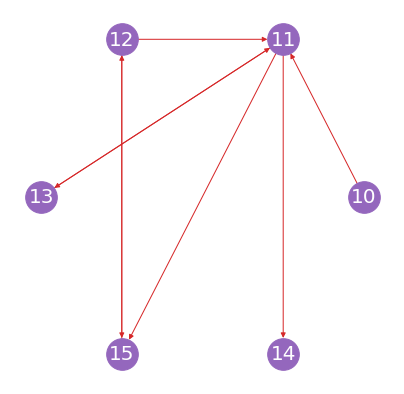

In [26]:
fig = plt.figure(figsize=(7, 7))
nx.draw_networkx(Gc,pos=nx.shell_layout(Gc),font_color="white",edge_color="C3",node_color="C4",node_size=1000, font_size=20)
plt.axis('off')
fname=path_fig+'callG.png'
# plt.savefig(fname)
plt.draw()

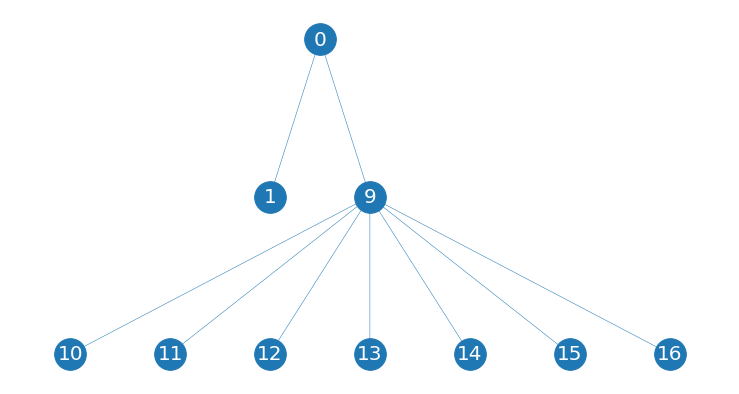

In [27]:
pos_dot = graphviz_layout(Gh, prog='dot')
fig = plt.figure(figsize=(13, 7))
nodes = nx.draw_networkx_nodes(Gh, pos_dot, node_size=1000, node_color='C0')
edges = nx.draw_networkx_edges(Gh, pos_dot,  edge_color="C0",width=0.5)
labels = nx.draw_networkx_labels(Gh, pos_dot, font_color="white", font_size=20)
plt.axis('off')
fname=path_fig+'hierG.png'
# plt.savefig(fname)
plt.show()